# Correlation
## phys481 week07

https://en.wikipedia.org/wiki/Correlation_and_dependence

<blockquote>
    In statistics, dependence or association is any statistical relationship, whether causal or not, between two random variables or bivariate data. In the broadest sense correlation is any statistical association, though in common usage it most often refers to how close two variables are to having a linear relationship with each other. Familiar examples of dependent phenomena include the correlation between the physical statures of parents and their offspring, and the correlation between the demand for a limited supply product and its price.
</blockquote>

## Pearson correlation coefficient

https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

The population correlation coefficient $\rho_{x,y}$ between two random variables $X$ and $Y$ with expected (mean) values $\mu_x$ & $\mu_y$ and variance $\sigma_x^2$ & $\sigma_y^2$ can be defined in terms of the covariance

$$\rho_{x,y} = \frac{cov(X,Y)}{\sigma_x \sigma_y} 
            = \frac{(X-\mu_x)(Y-\mu_y)}{\sigma_x \sigma_y}$$

The Pearson correlation is +1 in the case of a perfect direct (increasing) linear relationship (correlation), −1 in the case of a perfect decreasing (inverse) linear relationship (anticorrelation) and some value in the open interval (−1, 1) in all other cases, indicating the degree of linear dependence between the variables. As it approaches zero there is less of a relationship (closer to uncorrelated). The closer the coefficient is to either −1 or 1, the stronger the correlation between the variables.

If the variables are independent, Pearson's correlation coefficient is 0, but the converse is not true because the correlation coefficient detects only linear dependencies between two variables. For example, suppose the random variable X is symmetrically distributed about zero, and Y = X2. Then Y is completely determined by X, so that X and Y are perfectly dependent, but their correlation is zero; they are uncorrelated. However, in the special case when X and Y are jointly normal, uncorrelatedness is equivalent to independence.
            

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/800px-Correlation_examples2.svg.png">

If we have a series of n measurements of X and Y written as $x_i$ and $y_i$ for i = 1, ..., n, then the sample correlation coefficient can be used to estimate the population Pearson correlation $r$ between X and Y. The sample correlation coefficient has the form

 $$ r_{xy} = \frac{ \sum\limits_{i=1}^{n} (x_i - \bar x) (y_i - \bar y) }
 {\sqrt{  \sum\limits_{i=1}^{n} (x_i - \bar x)^2 (y_i - \bar y)^2 }}$$

and will always be in the range $[-1,+1]$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def mycorrelation(x,y):
    ''' calculate Pearson r correlation coefficient
    '''
    xbar, ybar = np.mean(x), np.mean(y)
    x0, y0 = x-xbar, y-ybar
    r = np.sum( x0 * y0 ) / np.sqrt( np.sum(x0**2) * np.sum(y0**2) )
    return r

Quick checks -

  1. a linearly increasing sequence should be perfectly correlated  with itself ($r=+1$)
  
  2. linearly increasing and decreasing sequences should be anticorrelated ($r=-1$)

In [3]:
a = [-1, 0, +1] 
b = [+1, 0, -1] 
c = [+1, 0, +1]
d = [-1, 0, -1]
print( 'r = ', mycorrelation(a,a) )
print( 'r = ', mycorrelation(a,b) )
print( 'r = ', mycorrelation(a,c) )
print( 'r = ', mycorrelation(c,d) )

r =  1.0
r =  -1.0
r =  0.0
r =  -1.0


### Random samples are correlated?!

Let us take 10 samples from a random number generator with a normal (Gaussian) distribution and call them "x".

Let us take another 10 samples and call them "y".

Assuming that the random number generator isn't defective, we might assume that $x$ and $y$ should be uncorrelated.  However, a quick experiment will usually return a non-zero result for $r$.

The important distinction here is that we are dealing with a "sample" estimate which should approach the "population" estimate as the sample gets larger.

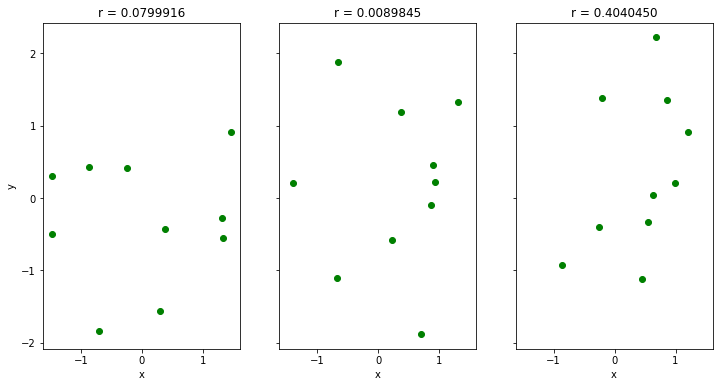

In [4]:
nsamples = 10
fig, axes = plt.subplots(1,3, figsize=(12,6), sharey=True, sharex=True)
for ax in axes:
    x = np.random.normal(size=nsamples)
    y = np.random.normal(size=nsamples)
    r = mycorrelation(x,y)
    ax.plot(x,y, 'og')
    ax.set_xlabel('x')
    if ax is axes[0]: ax.set_ylabel('y')
    ax.set_title('r = '+str(r)[0:9])

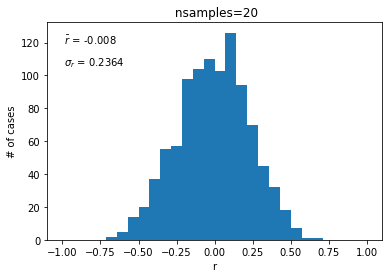

In [5]:
def show_correlation_histogram(nsamples=20, ntrials=999, axes=None):
    '''plot histogram of Pearson correlation coefficients for
    multiple random trials.
    '''
    axes = plt.gca() if axes is None else axes
    
    rstack = []
    for nt in range(ntrials):
        x, y = np.random.normal(size=(2,nsamples) )
        rstack.append( mycorrelation(x,y) )
    #print( 'r average = ',np.mean(rstack) )                  
        
        
    _ = axes.hist(rstack, bins=np.linspace(-1, +1, 29) )   
    axes.set_xlabel('r')
    axes.set_ylabel('# of cases')
    axes.set_title(' nsamples='+str(nsamples))
    axes.annotate( r'$\bar r$ = '+str(np.mean(rstack))[0:6], (0.05,0.9), xycoords='axes fraction' )
    axes.annotate( r'$\sigma_r$ = '+str(np.std(rstack))[0:6], (0.05,0.8), xycoords='axes fraction' )
    return rstack

show_correlation_histogram(); 

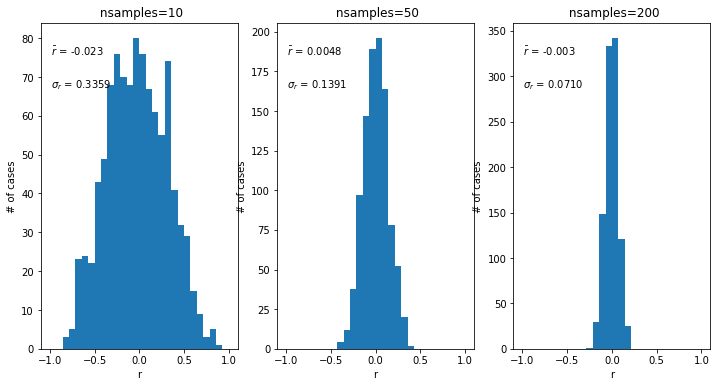

In [6]:
# As the number of samples becomes larger we approach
# the expected result of $r \approx 0$
#
nsamples = [10, 50, 200]
fig, axes = plt.subplots(1,len(nsamples), figsize=(12,6) )

for n,ax in zip(nsamples, axes):
    show_correlation_histogram(nsamples=n, axes=ax)

The numpy package includes a function for calculating the Pearson-r correlation coefficient.  However, it is important to note that it returns a matrix 

In [7]:
nsamples = 20
x, y = np.random.normal(size=(2,nsamples) )
print( np.corrcoef(x,y) )

[[1.         0.34855663]
 [0.34855663 1.        ]]


### p-values

The `scipy.stats.pearsonr` function will return the correlation coefficient along with an uncertainty estimate.

The p-value roughly indicates the probability of an uncorrelated system
producing datasets that have a Pearson correlation at least as extreme
as the one computed from these datasets

In [8]:
import scipy.stats
scipy.stats.pearsonr(x,y)

(0.34855663258940217, 0.13203654597200115)

In [9]:
?scipy.stats.pearsonr

<img src="https://imgs.xkcd.com/comics/significant.png">

<img src="http://scienceblogs.com/commonknowledge/wp-content/blogs.dir/276/files/2012/04/i-2eee97a9acb6558021e2925d9428d026-Lemongraph.jpg">

<img src="https://imgs.xkcd.com/comics/correlation.png">

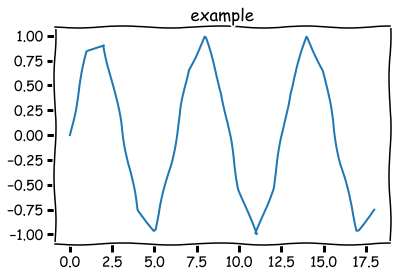

In [11]:
# How to make a plot xkcd-style:
#
with plt.xkcd():
    plt.plot( np.sin(np.arange(0,6*np.pi)))
    plt.title('example')